In [1]:
import pandas as pd
dff = pd.read_csv("data/updated_data.csv")
dff.head(10)

,Unnamed: 0,keyword,text,target
0,0,NaN,our deeds are reason of earthquake may allah f...,1
1,1,NaN,forest fire near la ronge sask canada,1
2,2,NaN,all residents asked to shelter in place are be...,1
3,3,NaN,people receive wildfires evacuation orders in...,1
4,4,NaN,just got sent photo from ruby alaska as smoke ...,1
5,5,NaN,rockyfire update california hwy closed in bot...,1
6,6,NaN,flood disaster heavy rain causes flash floodin...,1
7,7,NaN,i am on top of hill and can see fire in woods,1
8,8,NaN,there is emergency evacuation happening now in...,1
9,9,NaN,i am afraid tornado is coming to our area,1


In [2]:
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
# import nltk
# nltk.download()

In [3]:
import nltk

stopwords = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.PorterStemmer()

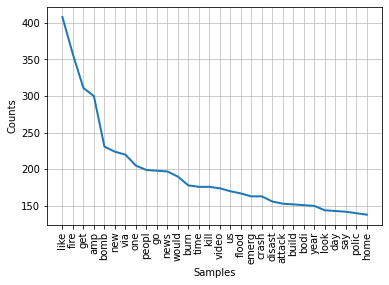

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [4]:
from nltk.tokenize import word_tokenize
import nltk

# tokenize all texts
words = [word_tokenize(text) for text in dff['text']]

words_list = []
for word in words:
    words_list.extend(word)

cleaned_wordlist = []
for word in words_list:
    if word in stopwords:
        continue
    stem_word = stemmer.stem(word)
    cleaned_wordlist.append(stem_word)

fdist = nltk.FreqDist(cleaned_wordlist)
fdist.plot(30)

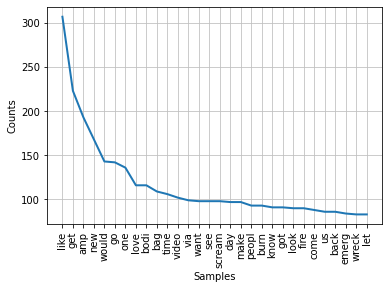

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [5]:
# tokenize only non-disaster texts
words = [word_tokenize(text) for text in dff.query('target==0')['text']]

words_list = []
for word in words:
    words_list.extend(word)

cleaned_wordlist = []
for word in words_list:
    if word in stopwords:
        continue
    stem_word = stemmer.stem(word)
    cleaned_wordlist.append(stem_word)

fdist = nltk.FreqDist(cleaned_wordlist)
non_disaster_words = fdist.most_common(20)
fdist.plot(30)

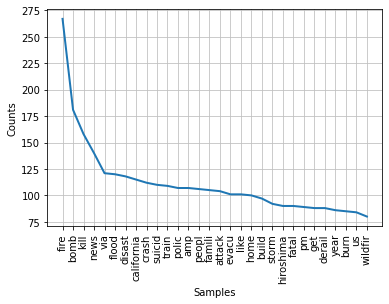

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [6]:
# tokenize only disaster texts
words = [word_tokenize(text) for text in dff.query('target==1')['text']]

words_list = []
for word in words:
    words_list.extend(word)

cleaned_wordlist = []
for word in words_list:
    if word in stopwords:
        continue
    stem_word = stemmer.stem(word)
    cleaned_wordlist.append(stem_word)

fdist = nltk.FreqDist(cleaned_wordlist)
disaster_words = fdist.most_common(20)

fdist.plot(30)

In [7]:
def clean_sentence(text):
    words = word_tokenize(text)

    cleaned_words = []
    for word in words:
        if word in stopwords:
            continue
        stem_word = stemmer.stem(word)
        cleaned_words.append(stem_word)
    return cleaned_words

def bag_of_words(text):
    words = clean_sentence(text)
    valuated_words = []
    for word in words:
        if word in non_disaster_words:
            evaluate_value = -10
        if word in disaster_words:
            evaluate_value = 10
        else:
            evaluate_value = 10
        valuated_words.append([word, evaluate_value])
    words_dictionary = dict(valuated_words)
    return words_dictionary


In [8]:
# disaster texts set
disaster_text = []
for text in dff.query('target==1')['text']:
    disaster_text.append((bag_of_words(text), 'disaster'))
 
# non-disaster texts set
non_disaster_text = []
for text in dff.query('target==0')['text']:
    non_disaster_text.append((bag_of_words(text), 'non-disaster'))

# shuffle texts to get test and train set
import random
random.shuffle(disaster_text)
random.shuffle(non_disaster_text)

test_set = disaster_text[:int(len(disaster_text)*0.2)] + non_disaster_text[:int(len(non_disaster_text)*0.2)]
train_set = disaster_text[int(len(disaster_text)*0.2):] + non_disaster_text[int(len(non_disaster_text)*0.2):]

In [9]:
test_set[0]

({'plan': 10,
  'former': 10,
  'first': 10,
  'ladi': 10,
  'wife': 10,
  'expresid': 10,
  'goodluck': 10,
  'jonathan': 10,
  'dame': 10,
  'patienc': 10,
  'hijack': 10},
 'disaster')

In [10]:
# train data with Naive Bayes
classifier = nltk.NaiveBayesClassifier.train(train_set)
print (classifier.show_most_informative_features(10)) 

Most Informative Features
                      mh = 10             disast : non-di =     56.2 : 1.0
               hiroshima = 10             disast : non-di =     55.3 : 1.0
                  bomber = 10             disast : non-di =     48.2 : 1.0
                   sever = 10             disast : non-di =     39.4 : 1.0
                 wildfir = 10             disast : non-di =     35.8 : 1.0
                 wreckag = 10             disast : non-di =     34.1 : 1.0
                outbreak = 10             disast : non-di =     27.0 : 1.0
                 reunion = 10             disast : non-di =     25.2 : 1.0
                   saudi = 10             disast : non-di =     24.3 : 1.0
             anniversari = 10             disast : non-di =     23.4 : 1.0
None


In [11]:
# get accuracy
accuracy = nltk.classify.accuracy(classifier, test_set)
print(accuracy)

0.7877792378449409
